## Results of isomap on Coil-20 dataset

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from parse import Parser

In [10]:
parser = Parser('../data/coil-20/coil-20-proc/','../data/mnist_train.csv','../data/netflix-dataset/netflix_titles.csv')


In [11]:
def plot_pca_2d(principa_components, labels, title):
    """Visualize the PCA results in 2D
    Args:
        principal_components: the principal components, shape N x 2
        labels: the labels of the data, shape N x 1
        title: the title of the plot
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(principa_components[:, 0], principa_components[:, 1], alpha=0.5,c=labels)
    plt.colorbar()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.show()

In [ ]:
images,labels = parser.coil20()
# isomap 

# flatten images
images_flat = images.reshape(images.shape[0], -1)

# isomap
iso = Isomap(n_components=2)
iso.fit(images_flat)
iso_images = iso.transform(images_flat)


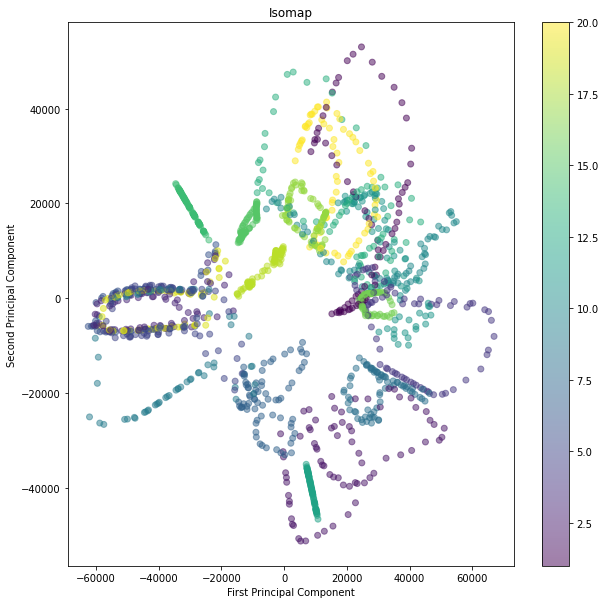

In [9]:
plot_pca_2d(iso_images, labels, 'Isomap')

## ISOMAP on the Olivetti faces dataset

In [10]:
from sklearn import datasets
olivetti = datasets.fetch_olivetti_faces()

In [ ]:
scaler = StandardScaler()
scaler.fit(olivetti.data)
olivetti.data = scaler.transform(olivetti.data)

iso = Isomap(n_components=2)
iso.fit(olivetti.data)
iso_images = iso.transform(olivetti.data)


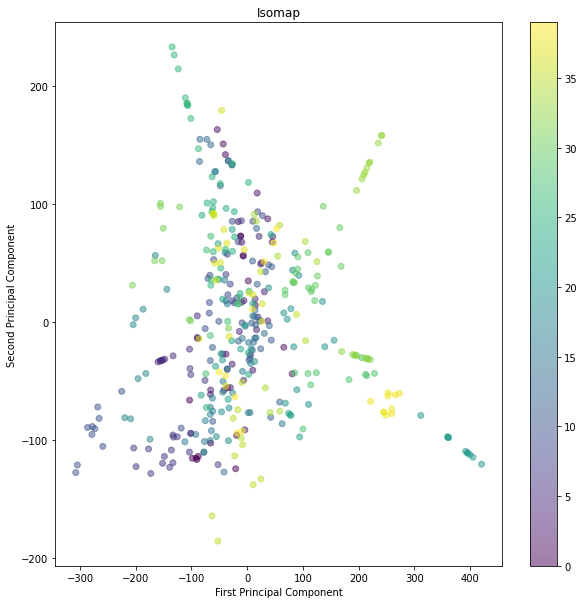

In [12]:
plot_pca_2d(iso_images, olivetti.target, 'Isomap')

## Netflix dataset

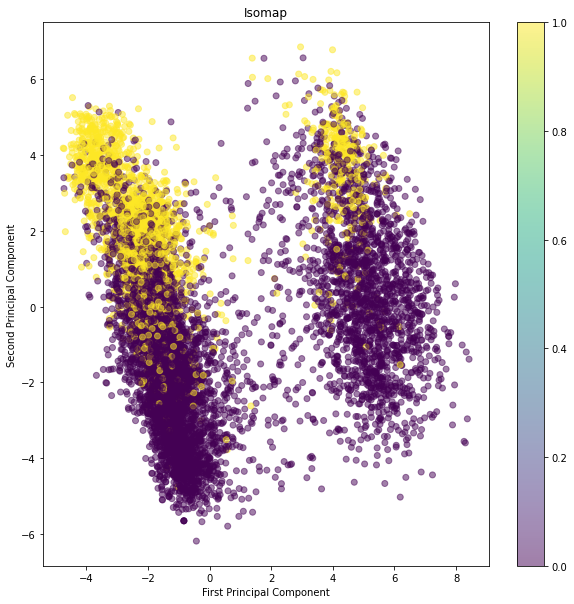

In [13]:

# netflix
X,y,df = parser.netflix()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
iso = Isomap(n_components=2)
iso.fit(X)
iso_images = iso.transform(X)
plot_pca_2d(iso_images, y, 'Isomap')

### MNIST dataset

In [12]:
import seaborn as sns
from scipy.linalg import eigh

In [13]:
df = pd.read_csv('../data/mnist_train.csv')
print(df.shape)
df.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
labels = df['label']
data = df.drop('label', axis = 1)
data = data.values
data = np.concatenate((data, labels.values.reshape(-1,1)), axis = 1)
X = data[:200, :-1]
y = data[:200, -1]
print(X.shape, y.shape)

(200, 784) (200,)


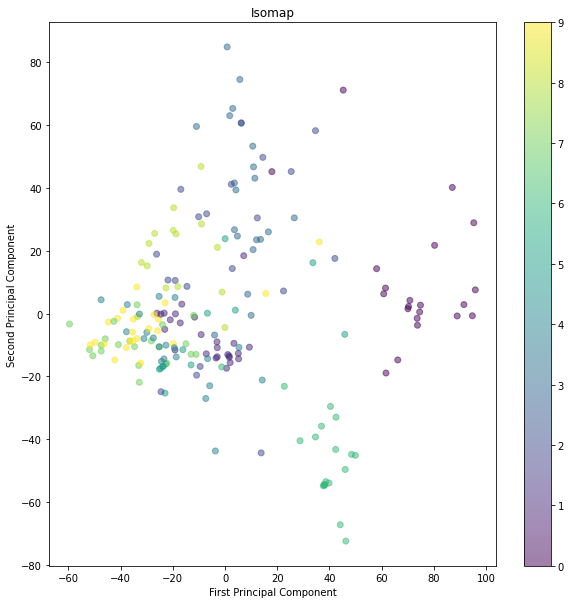

In [15]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
iso = Isomap(n_components=2)
iso.fit(X)
iso_images = iso.transform(X)
plot_pca_2d(iso_images, y, 'Isomap')